# **Problema da gorjeta - Utilizado lógica fuzzy**
Neste ensaio, tentarei criar um sistema de controle fuzzy no qual modela qual seria a porcentagem ideal de gorjeta em um estabelecimento. Será levado em consideração o serviço e a qualidade da comida, ambos avaliados entre 0 e 10. O resultado será a porcentagem de gorjeta, um valor entre 0 e 25%.

### **Ferramentas utilizadas**
*   Numpy
*   Scikit-fuzzy API

### **Formulação do problema**
*   *Antecedentes*
  1.   Serviço
      *   Espaço amostral (em valor crisp): Quão boa foi o atendimento prestado pelos funcionários, em uma escala de 0 a 10?
      *   Conjunto Fuzzy (em valores fuzzy): ruim, razoável, excelente
  2.   Qualidade da comida
      *   Espaço amostral (em valor crisp): Quão boa estava a comida, em uma escala de 0 a 10?
      *   Conjunto Fuzzy (em valores fuzzy): ruim, razoável, excelente

*   *Consequentes*
  1.   Gorjeta
      *   Espaço amostral: Qual a porcentagem de gorjeta?
      *   Conjunto Fuzzy: baixa, média, alta

*   *Regras fuzzy*
  1. SE o serviço foi excelente ou a qualidade da comida foi excelente, ENTÃO a gorjeta será alta
  2. SE o serviço foi razoável, ENTÃO a gorjeta será média
  3. SE o serviço foi ruim e a qualidade da comida foi ruim, ENTÃO a gorjeta será baixa

*   *EXEMPLO*
      * Se este sistema receber as entradas:
          * serviço nota 9.8
          * qualidade da comida nota 6.5
      * Deve recomendar a seguinte porcentagem de gorjeta:
          * 19.8%






In [ ]:
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [12]:
# antecedentes/consequentes
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# classificação (membership) automática - 3 rótulos (bad, average, excelent)/(low, medium, high)
fset_1, fset_2 = ['bad', 'average', 'excelent'], ['low', 'medium', 'high']
quality.automf(3, names=fset_1)
service.automf(3, names=fset_1)
tip.automf(3, names=fset_2)

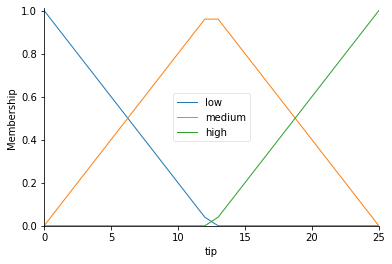

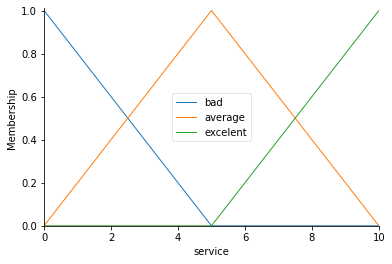

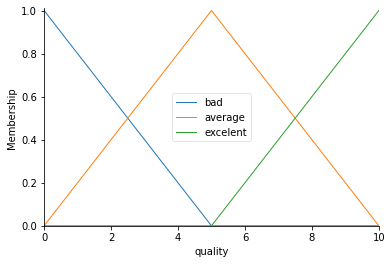

In [16]:
# para melhor visualização do clustering
tip.view()
service.view()
quality.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c432e68d0>)

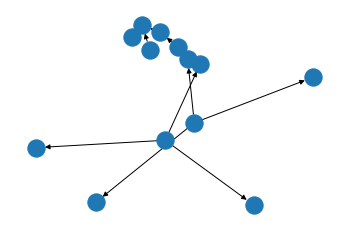

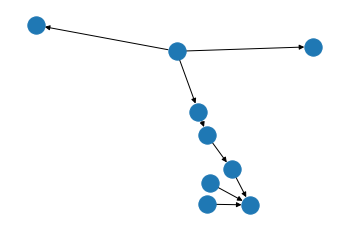

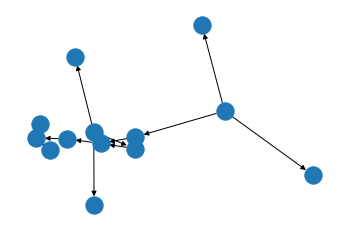

In [27]:
# estabelecendo um relacionamento entre as variáveis de entrada e saída
rule_1 = ctrl.Rule(quality['bad'] | service['bad'], tip['low'])
rule_2 = ctrl.Rule(service['average'], tip['medium'])
rule_3 = ctrl.Rule(service['excelent'] | quality['excelent'], tip['high'])

rule_1.view()
rule_2.view()
rule_3.view()

In [35]:
# criação do controle de sistema
tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3])
# aplicação do controle em um contexto específico
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# inserção dos dados de entrada (antecedentes) e cálculo de inferência
input_data = {
    'quality': 6.5,
    'service': 9.8
}
tipping.inputs(input_data)
tipping.compute()

GORJETA (EM %) = 19.8%


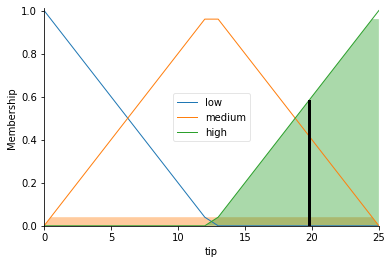

In [36]:
#visualização dos dados
perc = tipping.output['tip']
float_formatter = '{:.1f}'.format
print(f'GORJETA (EM %) = {float_formatter(perc)}%')
tip.view(sim=tipping)